In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/deefo/Downloads/omdena/fruit_data_with_colors.txt', sep="\t")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
features = ["fruit_label", "fruit_name","fruit_subtype","mass","width", "height","color_score"]
df[features].isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [5]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']

In [6]:
# I am using mutual information regression to see co-relation between target variable & features
from sklearn.feature_selection import mutual_info_regression

discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores # show a few features with their MI scores

color_score    0.820422
mass           0.655108
height         0.606835
width          0.483863
Name: MI Scores, dtype: float64

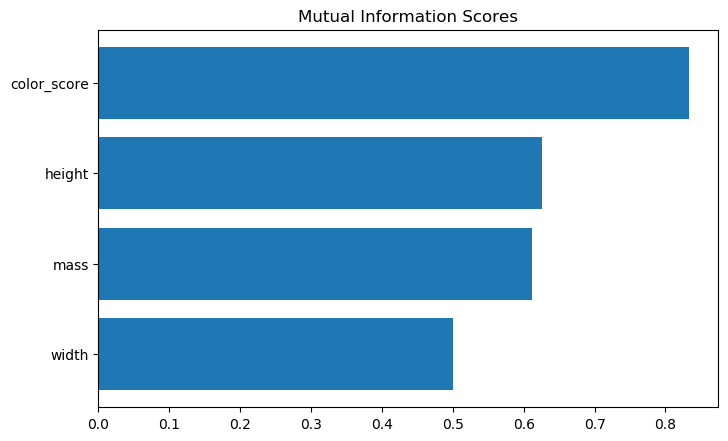

In [22]:
#ploting for visulation
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [7]:
#spliting data into test and train set with 20% and 80% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#Normalizing or scaling data set using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Traing and Evalution of model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.92


In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 4 1]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      0.80      0.89         5
           4       0.67      1.00      0.80         2

    accuracy                           0.92        12
   macro avg       0.92      0.95      0.92        12
weighted avg       0.94      0.92      0.92        12



In [ ]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense